# 🎄 Santa 2024 - The Perplexity Permutation Puzzle 🎄

## 🌟 Challenge Overview

This festive competition is all about restoring the magic of scrambled Christmas tales! Mischievous elves have jumbled the words in classic stories, and your task is to **reorder them to minimize perplexity**, bringing coherence and holiday cheer to these beloved texts. 

---

## 🎯 Objective

- Rearrange scrambled words to achieve the **lowest perplexity** scores.
- Transform chaotic passages into smooth, logical narratives.
- Compete with fellow Kagglers for the top spot on the leaderboard.

---

## 🛠️ My Approach

- **Analyze the Data**: Understand the structure of the jumbled passages and the perplexity metric.
- **Optimization Techniques**: Use metaheuristics like genetic algorithms or local search methods to reorder the words.
- **Evaluate and Iterate**: Continuously improve based on perplexity scores.

---

## 🎉 Let the Festivities Begin!

Join me as I untangle the words, solve the puzzle, and spread the joy of the season through beautifully flowing stories! ✨


In [1]:
import numpy as np
import pandas as pd

In [3]:
file_path = '/kaggle/input/dataset/sample_submission.csv'
data = pd.read_csv(file_path)

In [4]:

missing_data = data.isnull().sum()
duplicated_entries = data.duplicated().sum()

data['word_count'] = data['text'].apply(lambda x: len(str(x).split()))

summary = {
    "Total Entries": len(data),
    "Missing Values": missing_data.to_dict(),
    "Duplicated Entries": duplicated_entries,
    "Average Word Count": data['word_count'].mean(),
    "Maximum Word Count": data['word_count'].max(),
    "Minimum Word Count": data['word_count'].min(),
}


In [5]:
print("Dataset Summary:")
for key, value in summary.items():
    print(f"{key}: {value}")

Dataset Summary:
Total Entries: 6
Missing Values: {'id': 0, 'text': 0}
Duplicated Entries: 0
Average Word Count: 38.333333333333336
Maximum Word Count: 100
Minimum Word Count: 10


In [6]:
data.head()

,id,text,word_count
0,0,advent chimney elf family fireplace gingerbrea...,10
1,1,advent chimney elf family fireplace gingerbrea...,20
2,2,yuletide decorations gifts cheer holiday carol...,20
3,3,yuletide decorations gifts cheer holiday carol...,30
4,4,hohoho candle poinsettia snowglobe peppermint ...,50


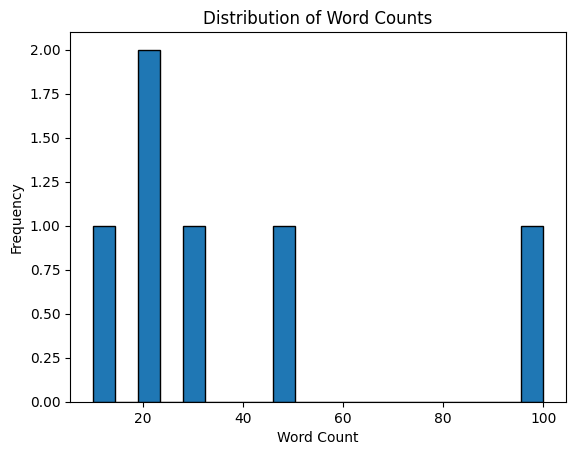

In [7]:
import matplotlib.pyplot as plt

# Histogram of word counts
plt.hist(data['word_count'], bins=20, edgecolor='black')
plt.title("Distribution of Word Counts")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()

In [8]:
from nltk.tokenize import word_tokenize

# Tokenize each text passage
data['tokens'] = data['text'].apply(word_tokenize)

# Display tokenized sample
data[['id', 'tokens']].head()


,id,tokens
0,0,"[advent, chimney, elf, family, fireplace, ging..."
1,1,"[advent, chimney, elf, family, fireplace, ging..."
2,2,"[yuletide, decorations, gifts, cheer, holiday,..."
3,3,"[yuletide, decorations, gifts, cheer, holiday,..."
4,4,"[hohoho, candle, poinsettia, snowglobe, pepper..."


In [9]:
from collections import Counter

# Combine all tokens into a single list
all_words = [word for tokens in data['tokens'] for word in tokens]
word_counts = Counter(all_words)

# Display the most common words
most_common = word_counts.most_common(10)
print("Most Common Words:", most_common)

Most Common Words: [('chimney', 6), ('ornament', 6), ('the', 6), ('and', 6), ('fireplace', 5), ('cheer', 5), ('workshop', 5), ('night', 4), ('of', 4), ('advent', 3)]


In [10]:
import random

# Shuffle the words in a passage
def shuffle_words(text):
    words = text.split()
    random.shuffle(words)
    return " ".join(words)

# Example: Shuffle words in one passage
data['shuffled_text'] = data['text'].apply(shuffle_words)
data[['id', 'shuffled_text']].head()

,id,shuffled_text
0,0,ornament elf family mistletoe scrooge advent f...
1,1,laugh gingerbread ornament family reindeer chi...
2,2,magi nice holiday nutcracker carol polar ornam...
3,3,workshop cheer decorations jingle ornament of ...
4,4,it milk wish fireplace chocolate poinsettia yo...


In [19]:
import random

# Reverse the words in a passage
def reverse_words(text):
    words = text.split()
    return " ".join(words[::-1])

# Rotate the words in a passage
def rotate_words(text):
    words = text.split()
    n = random.randint(1, len(words))  # Random rotation amount
    return " ".join(words[n:] + words[:n])

# Randomly swap two words in a passage
def random_swap(text):
    words = text.split()
    if len(words) < 2:  # No swap if fewer than 2 words
        return text
    i, j = random.sample(range(len(words)), 2)
    words[i], words[j] = words[j], words[i]
    return " ".join(words)

# Combine operations to generate a random transformation
def random_order(text):
    operations = [reverse_words, rotate_words, random_swap]
    operation = random.choice(operations)  # Randomly select an operation
    return operation(text)

# Apply the random order function to the dataset
data['random_ordered_text'] = data['text'].apply(random_order)
data[['id', 'random_ordered_text']].head()


,id,random_ordered_text
0,0,scrooge advent chimney elf family fireplace gi...
1,1,advent chimney elf family bake gingerbread mis...
2,2,yuletide decorations gifts cheer holiday ornam...
3,3,grinch sleigh chimney workshop stocking orname...
4,4,hohoho candle poinsettia snowglobe peppermint ...


In [20]:
# Select a single example for demonstration
example_text = data['text'].iloc[0]
print(f"Original Text: {example_text}\n")

# Apply each transformation and print the results
reversed_text = reverse_words(example_text)
print(f"Reversed Text: {reversed_text}\n")

rotated_text = rotate_words(example_text)
print(f"Rotated Text: {rotated_text}\n")

swapped_text = random_swap(example_text)
print(f"Swapped Text: {swapped_text}\n")

randomized_text = random_order(example_text)
print(f"Randomly Transformed Text: {randomized_text}\n")

Original Text: advent chimney elf family fireplace gingerbread mistletoe ornament reindeer scrooge

Reversed Text: scrooge reindeer ornament mistletoe gingerbread fireplace family elf chimney advent

Rotated Text: gingerbread mistletoe ornament reindeer scrooge advent chimney elf family fireplace

Swapped Text: advent family elf chimney fireplace gingerbread mistletoe ornament reindeer scrooge

Randomly Transformed Text: fireplace gingerbread mistletoe ornament reindeer scrooge advent chimney elf family

